# Convolution Neural Network:
Convolutional Neural Network (CNN) is an advanced version of artificial neural networks (ANNs), primarily designed to extract features from grid-like matrix datasets. This is particularly useful for visual datasets such as images or videos, where data patterns play a crucial role. CNNs are widely used in computer vision applications due to their effectiveness in processing visual data.

CNNs consist of multiple layers like the input layer, Convolutional layer, pooling layer, and fully connected layer



                                                            
Convolutional Neural Networks (CNNs) are a class of deep neural networks commonly used in image recognition and processing. When discussing CNNs, several key terms and concepts come into play:

Convolutional Layer: This layer applies convolutional operations to the input, producing feature maps. It is the core building block of a CNN.
Convolutional Operation: This operation involves a kernel (or filter) that is passed over the input data, performing element-wise multiplication with the part of the input it is currently focused on. The result is a single value in the output feature map.                                                            s.

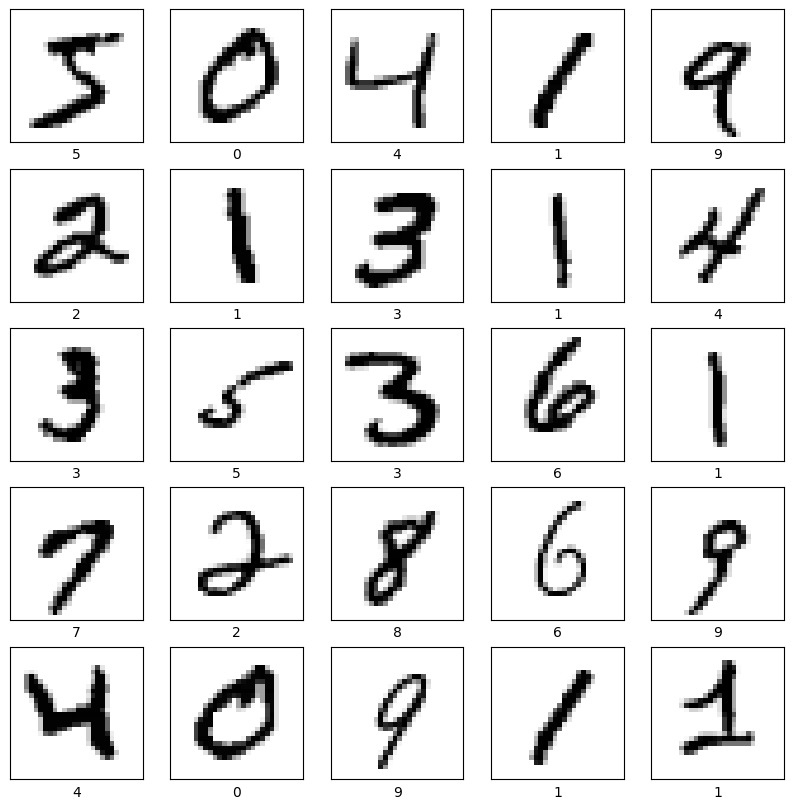

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Display some sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

plt.show()


In [5]:
# Explore the data
print(f"We have {len(x_train)} images in the training set and {len(x_test)} images in the test set.")
print(f"The size of the image is {x_train[0].shape}")

We have 60000 images in the training set and 10000 images in the test set.
The size of the image is (28, 28)


In [6]:
# Data shapes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


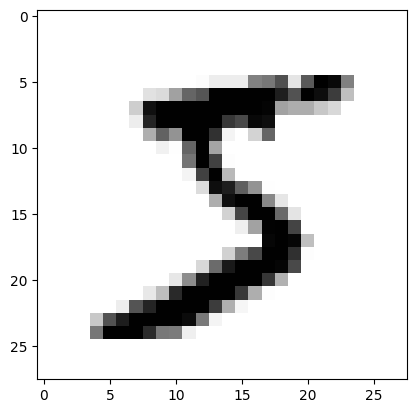

In [7]:
# Display the first image
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()


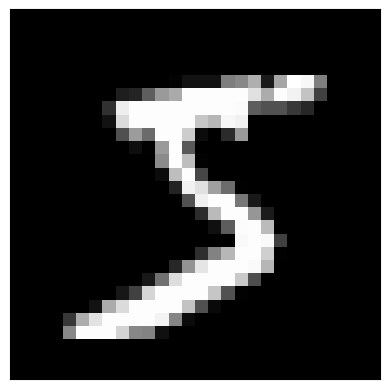

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   

In [8]:
# Display the first image as a data matrix
plt.imshow(x_train[0], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display pixel values
print("Pixel values:")
for row in x_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()


In [9]:

# Normalize the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0




Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.071 0.071 0.071 0.494 0.533 0.686 0.102 

<Figure size 640x480 with 0 Axes>

<Axes: >

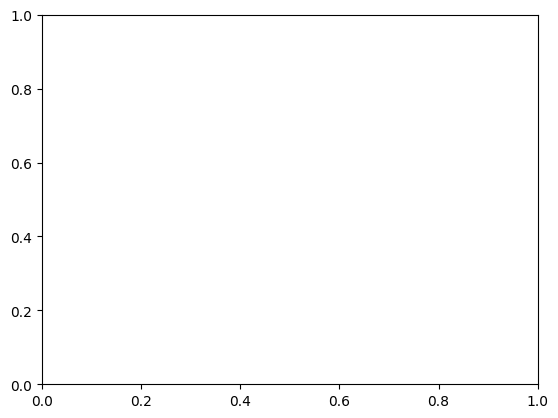

In [10]:
# Display pixel values after normalization
print("\nPixel values after normalization:")
for row in x_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()

# Reshape images to have a channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Display the complete output of the cell
display(plt.gcf())
display(plt.gca())



In [2]:
import tensorflow as tf  # Ensure TensorFlow is imported

# Define the CNN model
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))  # 28x28 pixel images with a single color channel

model = tf.keras.Sequential([
    input_layer,  # Input layer
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),  # Convolutional layer
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),  # Convolutional layer
    tf.keras.layers.MaxPooling2D(),  # Pooling layer
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),  # Convolutional layer
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),  # Convolutional layer
    tf.keras.layers.MaxPooling2D(),  # Pooling layer
    tf.keras.layers.Flatten(),  # Flatten layer
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer
])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                    

In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                  

In [10]:
model.save("digit_recognizer_model.h5")  # Save trained model
